In [50]:
#INSTALAR LIBRERIAS
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install openpyxl
!pip install scikit

ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [51]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
#Convertimos el dataset en dataframe
df= pd.read_csv("actividad2d.csv")
df["price"] = df["price"].replace('[\$,]', '', regex=True)
df["price"] = df["price"].astype(float)
df

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_34287/864364118.py:3: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True)


,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,host_is_superhost,host_verifications,host_identity_verified,has_availability,instant_bookable,amenities,host_since,host_location,host_name,listing_url
0,0,42.382580,-71.136460,5,1.0,2.0,2.0,270.0,2,1125,...,t,"['email', 'phone']",t,t,f,"[""Children\u2019s dinnerware"", ""Baking sheet"",...",2010-12-01,"Cambridge, MA",Janet,https://www.airbnb.com/rooms/8521
1,1,42.396300,-71.131350,3,1.0,1.0,0.0,154.0,3,14,...,t,"['email', 'phone']",t,t,f,"[""Central air conditioning"", ""Heating"", ""Coffe...",2009-09-24,"Cambridge, MA",Judith L,https://www.airbnb.com/rooms/11169
2,2,42.362580,-71.096030,1,1.0,1.0,1.0,154.0,10,730,...,t,"['email', 'phone']",t,t,t,"[""Heating"", ""Luggage dropoff allowed"", ""Genera...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/19581
3,3,42.362540,-71.096980,2,1.0,1.0,1.0,183.0,5,730,...,t,"['email', 'phone']",t,t,t,"[""Baking sheet"", ""Paid washer \u2013 In buildi...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/27498
4,4,42.369500,-71.099210,4,1.0,2.0,2.0,300.0,3,365,...,t,"['email', 'phone']",t,t,f,"[""Heating"", ""Coffee maker"", ""Iron"", ""Refrigera...",2011-03-08,"Cambridge, MA",Kevin,https://www.airbnb.com/rooms/79762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1370,42.365136,-71.099673,4,1.0,2.0,3.0,261.0,1,120,...,f,"['email', 'phone']",t,t,f,"[""Baking sheet"", ""Heating"", ""Books and reading...",2016-05-25,"Cambridge, MA",Blake,https://www.airbnb.com/rooms/1442190452341432060
1371,1371,42.363767,-71.108582,2,2.0,1.0,2.0,104.0,1,365,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443555192209357989
1372,1372,42.363650,-71.109660,2,2.0,1.0,1.0,88.0,1,365,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443585853586366833
1373,1373,42.363145,-71.087892,5,2.0,2.0,2.0,290.0,30,730,...,f,"['email', 'phone', 'work_email']",t,t,t,"[""Heating"", ""Coffee maker"", ""Dishwasher"", ""Iro...",2014-09-02,"Boston, MA",Compass,https://www.airbnb.com/rooms/1447874951198409920


In [53]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1375 non-null   int64  
 1   latitude                      1375 non-null   float64
 2   longitude                     1375 non-null   float64
 3   accommodates                  1375 non-null   int64  
 4   bathrooms                     1137 non-null   float64
 5   bedrooms                      1299 non-null   float64
 6   beds                          1135 non-null   float64
 7   price                         1130 non-null   float64
 8   minimum_nights                1375 non-null   int64  
 9   maximum_nights                1375 non-null   int64  
 10  minimum_minimum_nights        1374 non-null   float64
 11  maximum_minimum_nights        1374 non-null   float64
 12  minimum_maximum_nights        1374 non-null   float64
 13  max

In [54]:
#Sustituir valores nulos por valores no nulos hacia adelante forward fill" ("ffill")
df.isnull().sum()

Unnamed: 0                         0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                        238
bedrooms                          76
beds                             240
price                            245
minimum_nights                     0
maximum_nights                     0
minimum_minimum_nights             1
maximum_minimum_nights             1
minimum_maximum_nights             1
maximum_maximum_nights             1
minimum_nights_avg_ntm             0
maximum_nights_avg_ntm             0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating             336
review_scores_accuracy           336
review_scores_cleanliness        336
review_scores_checkin            336
r

In [55]:
df =df.fillna(method="ffill") 

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_34287/710401907.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="ffill")


In [56]:
df.isnull().sum()

Unnamed: 0                         0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
price                              0
minimum_nights                     0
maximum_nights                     0
minimum_minimum_nights             0
maximum_minimum_nights             0
minimum_maximum_nights             0
maximum_maximum_nights             0
minimum_nights_avg_ntm             0
maximum_nights_avg_ntm             0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating               0
review_scores_accuracy             0
review_scores_cleanliness          0
review_scores_checkin              0
r

**K=3**

In [57]:
# Preparamos los datos para clustering
X = df[['review_scores_accuracy', 'number_of_reviews']].values 
X

array([[  4.95,  79.  ],
       [  4.74, 189.  ],
       [  4.6 ,  12.  ],
       ...,
       [  5.  ,   0.  ],
       [  5.  ,   0.  ],
       [  5.  ,   0.  ]], shape=(1375, 2))

In [58]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [59]:
#Entrenamos el modelo y obtenemos etiquetas predecidas
etiquetas = kmeans.fit_predict(X)
etiquetas

array([0, 1, 0, ..., 0, 0, 0], shape=(1375,), dtype=int32)

In [60]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[  4.74677693,  16.74978796],
       [  4.86339744, 211.48717949],
       [  4.888     , 510.425     ]])

In [61]:
# Agregamos la columna cluster_1D con las etiquetas obtenidas en una posición específica
df.insert(loc=7, column='cluster_2D', value= etiquetas)
df

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cluster_2D,price,minimum_nights,...,host_is_superhost,host_verifications,host_identity_verified,has_availability,instant_bookable,amenities,host_since,host_location,host_name,listing_url
0,0,42.382580,-71.136460,5,1.0,2.0,2.0,0,270.0,2,...,t,"['email', 'phone']",t,t,f,"[""Children\u2019s dinnerware"", ""Baking sheet"",...",2010-12-01,"Cambridge, MA",Janet,https://www.airbnb.com/rooms/8521
1,1,42.396300,-71.131350,3,1.0,1.0,0.0,1,154.0,3,...,t,"['email', 'phone']",t,t,f,"[""Central air conditioning"", ""Heating"", ""Coffe...",2009-09-24,"Cambridge, MA",Judith L,https://www.airbnb.com/rooms/11169
2,2,42.362580,-71.096030,1,1.0,1.0,1.0,0,154.0,10,...,t,"['email', 'phone']",t,t,t,"[""Heating"", ""Luggage dropoff allowed"", ""Genera...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/19581
3,3,42.362540,-71.096980,2,1.0,1.0,1.0,0,183.0,5,...,t,"['email', 'phone']",t,t,t,"[""Baking sheet"", ""Paid washer \u2013 In buildi...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/27498
4,4,42.369500,-71.099210,4,1.0,2.0,2.0,2,300.0,3,...,t,"['email', 'phone']",t,t,f,"[""Heating"", ""Coffee maker"", ""Iron"", ""Refrigera...",2011-03-08,"Cambridge, MA",Kevin,https://www.airbnb.com/rooms/79762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1370,42.365136,-71.099673,4,1.0,2.0,3.0,0,261.0,1,...,f,"['email', 'phone']",t,t,f,"[""Baking sheet"", ""Heating"", ""Books and reading...",2016-05-25,"Cambridge, MA",Blake,https://www.airbnb.com/rooms/1442190452341432060
1371,1371,42.363767,-71.108582,2,2.0,1.0,2.0,0,104.0,1,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443555192209357989
1372,1372,42.363650,-71.109660,2,2.0,1.0,1.0,0,88.0,1,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443585853586366833
1373,1373,42.363145,-71.087892,5,2.0,2.0,2.0,0,290.0,30,...,f,"['email', 'phone', 'work_email']",t,t,t,"[""Heating"", ""Coffee maker"", ""Dishwasher"", ""Iro...",2014-09-02,"Boston, MA",Compass,https://www.airbnb.com/rooms/1447874951198409920


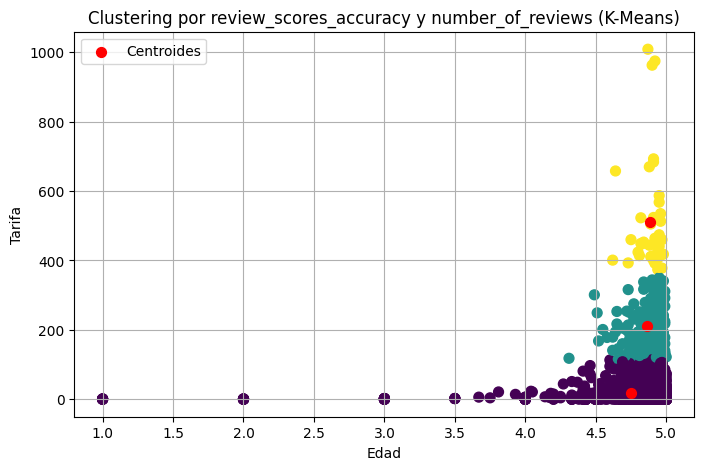

In [62]:
# Para visualizar en 2D, Se utiliza una variable como eje X y la otra variable como eje Y
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por review_scores_accuracy y number_of_reviews (K-Means)")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.legend()
plt.grid(True)
plt.show()

**K=2**

In [63]:
X=df[['host_listings_count', 'accommodates', 'beds', 'price']].values
X

array([[  2.,   5.,   2., 270.],
       [  4.,   3.,   0., 154.],
       [  3.,   1.,   1., 154.],
       ...,
       [ 56.,   2.,   1.,  88.],
       [137.,   5.,   2., 290.],
       [137.,   3.,   1., 242.]], shape=(1375, 4))

In [64]:
df["price"].head()


0    270.0
1    154.0
2    154.0
3    183.0
4    300.0
Name: price, dtype: float64

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [67]:
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([0, 0, 0, ..., 0, 0, 0], shape=(1375,), dtype=int32)

In [68]:
centroides = kmeans.cluster_centers_
centroides

array([[ 2.94039290e-03, -7.49040496e-03, -1.42979697e-03,
        -8.52565808e-02],
       [-4.01363631e-01,  1.02244028e+00,  1.95167286e-01,
         1.16375233e+01]])

In [69]:
df.insert(loc=8, column='cluster_4D', value= etiquetas)
df

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cluster_2D,cluster_4D,price,...,host_is_superhost,host_verifications,host_identity_verified,has_availability,instant_bookable,amenities,host_since,host_location,host_name,listing_url
0,0,42.382580,-71.136460,5,1.0,2.0,2.0,0,0,270.0,...,t,"['email', 'phone']",t,t,f,"[""Children\u2019s dinnerware"", ""Baking sheet"",...",2010-12-01,"Cambridge, MA",Janet,https://www.airbnb.com/rooms/8521
1,1,42.396300,-71.131350,3,1.0,1.0,0.0,1,0,154.0,...,t,"['email', 'phone']",t,t,f,"[""Central air conditioning"", ""Heating"", ""Coffe...",2009-09-24,"Cambridge, MA",Judith L,https://www.airbnb.com/rooms/11169
2,2,42.362580,-71.096030,1,1.0,1.0,1.0,0,0,154.0,...,t,"['email', 'phone']",t,t,t,"[""Heating"", ""Luggage dropoff allowed"", ""Genera...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/19581
3,3,42.362540,-71.096980,2,1.0,1.0,1.0,0,0,183.0,...,t,"['email', 'phone']",t,t,t,"[""Baking sheet"", ""Paid washer \u2013 In buildi...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/27498
4,4,42.369500,-71.099210,4,1.0,2.0,2.0,2,0,300.0,...,t,"['email', 'phone']",t,t,f,"[""Heating"", ""Coffee maker"", ""Iron"", ""Refrigera...",2011-03-08,"Cambridge, MA",Kevin,https://www.airbnb.com/rooms/79762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1370,42.365136,-71.099673,4,1.0,2.0,3.0,0,0,261.0,...,f,"['email', 'phone']",t,t,f,"[""Baking sheet"", ""Heating"", ""Books and reading...",2016-05-25,"Cambridge, MA",Blake,https://www.airbnb.com/rooms/1442190452341432060
1371,1371,42.363767,-71.108582,2,2.0,1.0,2.0,0,0,104.0,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443555192209357989
1372,1372,42.363650,-71.109660,2,2.0,1.0,1.0,0,0,88.0,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443585853586366833
1373,1373,42.363145,-71.087892,5,2.0,2.0,2.0,0,0,290.0,...,f,"['email', 'phone', 'work_email']",t,t,t,"[""Heating"", ""Coffee maker"", ""Dishwasher"", ""Iro...",2014-09-02,"Boston, MA",Compass,https://www.airbnb.com/rooms/1447874951198409920


In [70]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

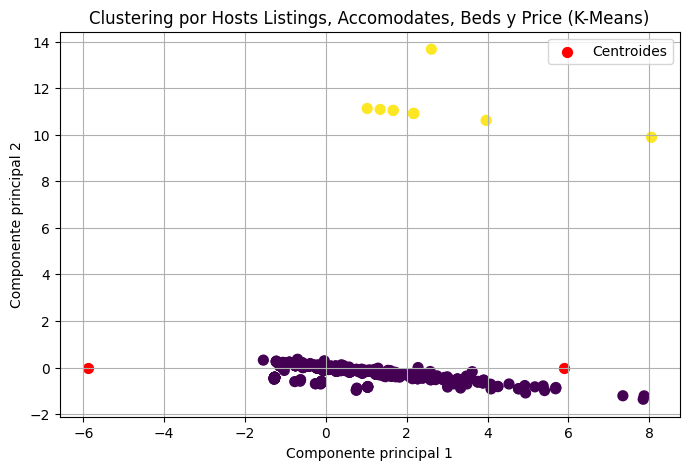

In [71]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Hosts Listings, Accomodates, Beds y Price (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

**k=5**

In [72]:
X = df[['price', 'review_scores_value', 'review_scores_location' ]].values
X

array([[270.  ,   4.74,   4.93],
       [154.  ,   4.77,   4.79],
       [154.  ,   4.3 ,   4.9 ],
       ...,
       [ 88.  ,   5.  ,   5.  ],
       [290.  ,   5.  ,   5.  ],
       [242.  ,   5.  ,   5.  ]], shape=(1375, 3))

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
#Aplicamos K-means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [75]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([4, 4, 0, ..., 4, 4, 4], shape=(1375,), dtype=int32)

In [76]:
centroides = kmeans.cluster_centers_
centroides

array([[-0.09051915, -0.54294127, -0.27513355],
       [11.63752328,  0.5702777 ,  0.40120962],
       [-0.07191931, -5.89593949, -8.17654214],
       [-0.08379685, -3.22152934, -0.68755429],
       [-0.08386373,  0.38630486,  0.23387808]])

In [77]:
df.insert(loc=8, column='cluster_5D', value= etiquetas)
df

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cluster_2D,cluster_5D,cluster_4D,...,host_is_superhost,host_verifications,host_identity_verified,has_availability,instant_bookable,amenities,host_since,host_location,host_name,listing_url
0,0,42.382580,-71.136460,5,1.0,2.0,2.0,0,4,0,...,t,"['email', 'phone']",t,t,f,"[""Children\u2019s dinnerware"", ""Baking sheet"",...",2010-12-01,"Cambridge, MA",Janet,https://www.airbnb.com/rooms/8521
1,1,42.396300,-71.131350,3,1.0,1.0,0.0,1,4,0,...,t,"['email', 'phone']",t,t,f,"[""Central air conditioning"", ""Heating"", ""Coffe...",2009-09-24,"Cambridge, MA",Judith L,https://www.airbnb.com/rooms/11169
2,2,42.362580,-71.096030,1,1.0,1.0,1.0,0,0,0,...,t,"['email', 'phone']",t,t,t,"[""Heating"", ""Luggage dropoff allowed"", ""Genera...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/19581
3,3,42.362540,-71.096980,2,1.0,1.0,1.0,0,4,0,...,t,"['email', 'phone']",t,t,t,"[""Baking sheet"", ""Paid washer \u2013 In buildi...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/27498
4,4,42.369500,-71.099210,4,1.0,2.0,2.0,2,4,0,...,t,"['email', 'phone']",t,t,f,"[""Heating"", ""Coffee maker"", ""Iron"", ""Refrigera...",2011-03-08,"Cambridge, MA",Kevin,https://www.airbnb.com/rooms/79762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1370,42.365136,-71.099673,4,1.0,2.0,3.0,0,4,0,...,f,"['email', 'phone']",t,t,f,"[""Baking sheet"", ""Heating"", ""Books and reading...",2016-05-25,"Cambridge, MA",Blake,https://www.airbnb.com/rooms/1442190452341432060
1371,1371,42.363767,-71.108582,2,2.0,1.0,2.0,0,4,0,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443555192209357989
1372,1372,42.363650,-71.109660,2,2.0,1.0,1.0,0,4,0,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443585853586366833
1373,1373,42.363145,-71.087892,5,2.0,2.0,2.0,0,4,0,...,f,"['email', 'phone', 'work_email']",t,t,t,"[""Heating"", ""Coffee maker"", ""Dishwasher"", ""Iro...",2014-09-02,"Boston, MA",Compass,https://www.airbnb.com/rooms/1447874951198409920


In [78]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

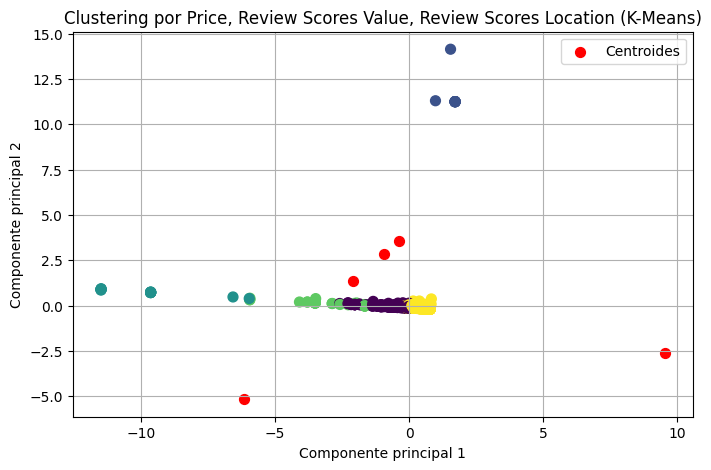

In [79]:

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')
plt.title("Clustering por Price, Review Scores Value, Review Scores Location (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

**k=4**

In [80]:
X = df[['host_listings_count', 'accommodates', 'beds', 'availability_30' ]].values
X

array([[  2.,   5.,   2.,   0.],
       [  4.,   3.,   0.,  25.],
       [  3.,   1.,   1.,  15.],
       ...,
       [ 56.,   2.,   1.,   0.],
       [137.,   5.,   2.,   1.],
       [137.,   3.,   1.,   5.]], shape=(1375, 4))

In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
#Aplicamos K-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [83]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([0, 1, 1, ..., 1, 0, 1], shape=(1375,), dtype=int32)

In [84]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[-0.38568001,  0.40880229,  0.37226509, -0.46199839],
       [-0.3641337 , -0.54321917, -0.5309011 ,  0.30515884],
       [ 2.65149432, -0.17248941, -0.28252593, -0.51984127],
       [-0.39774652,  2.15195787,  2.3303338 ,  0.25644466]])

In [85]:
# Agregamos la columna cluster_2D con las etiquetas obtenidas en una posición específica
df.insert(loc=8, column='cluster_6D', value= etiquetas)
df

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cluster_2D,cluster_6D,cluster_5D,...,host_is_superhost,host_verifications,host_identity_verified,has_availability,instant_bookable,amenities,host_since,host_location,host_name,listing_url
0,0,42.382580,-71.136460,5,1.0,2.0,2.0,0,0,4,...,t,"['email', 'phone']",t,t,f,"[""Children\u2019s dinnerware"", ""Baking sheet"",...",2010-12-01,"Cambridge, MA",Janet,https://www.airbnb.com/rooms/8521
1,1,42.396300,-71.131350,3,1.0,1.0,0.0,1,1,4,...,t,"['email', 'phone']",t,t,f,"[""Central air conditioning"", ""Heating"", ""Coffe...",2009-09-24,"Cambridge, MA",Judith L,https://www.airbnb.com/rooms/11169
2,2,42.362580,-71.096030,1,1.0,1.0,1.0,0,1,0,...,t,"['email', 'phone']",t,t,t,"[""Heating"", ""Luggage dropoff allowed"", ""Genera...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/19581
3,3,42.362540,-71.096980,2,1.0,1.0,1.0,0,1,4,...,t,"['email', 'phone']",t,t,t,"[""Baking sheet"", ""Paid washer \u2013 In buildi...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/27498
4,4,42.369500,-71.099210,4,1.0,2.0,2.0,2,0,4,...,t,"['email', 'phone']",t,t,f,"[""Heating"", ""Coffee maker"", ""Iron"", ""Refrigera...",2011-03-08,"Cambridge, MA",Kevin,https://www.airbnb.com/rooms/79762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1370,42.365136,-71.099673,4,1.0,2.0,3.0,0,0,4,...,f,"['email', 'phone']",t,t,f,"[""Baking sheet"", ""Heating"", ""Books and reading...",2016-05-25,"Cambridge, MA",Blake,https://www.airbnb.com/rooms/1442190452341432060
1371,1371,42.363767,-71.108582,2,2.0,1.0,2.0,0,0,4,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443555192209357989
1372,1372,42.363650,-71.109660,2,2.0,1.0,1.0,0,1,4,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443585853586366833
1373,1373,42.363145,-71.087892,5,2.0,2.0,2.0,0,0,4,...,f,"['email', 'phone', 'work_email']",t,t,t,"[""Heating"", ""Coffee maker"", ""Dishwasher"", ""Iro...",2014-09-02,"Boston, MA",Compass,https://www.airbnb.com/rooms/1447874951198409920


In [86]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

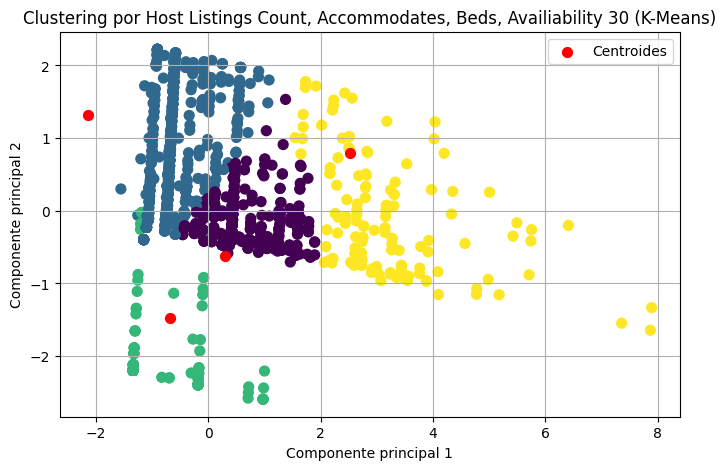

In [87]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Host Listings Count, Accommodates, Beds, Availiability 30 (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

**k=10**

In [88]:
X = df[['review_scores_checkin', 'host_listings_count', 'review_scores_cleanliness', 'review_scores_rating', 'minimum_nights' ]].values
X

array([[  4.89,   2.  ,   4.97,   4.83,   2.  ],
       [  4.91,   4.  ,   4.78,   4.79,   3.  ],
       [  4.6 ,   3.  ,   4.6 ,   4.55,  10.  ],
       ...,
       [  5.  ,  56.  ,   5.  ,   5.  ,   1.  ],
       [  5.  , 137.  ,   5.  ,   5.  ,  30.  ],
       [  5.  , 137.  ,   5.  ,   5.  ,  30.  ]], shape=(1375, 5))

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
#Aplicamos K-means con 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [91]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([0, 0, 8, ..., 0, 2, 2], shape=(1375,), dtype=int32)

In [92]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[  0.26044758,  -0.4051642 ,   0.38972986,   0.34408743,
         -0.57322276],
       [ -1.31873477,   1.88874845,  -4.8869482 ,  -5.42443135,
          0.44062606],
       [  0.24159494,  -0.34141818,   0.27649707,   0.31768406,
          0.23164179],
       [-10.11637989,  -0.3035797 ,   0.59303368,  -5.8513368 ,
          0.04644301],
       [  0.09106182,   2.6426607 ,   0.21305677,   0.20041591,
          0.29075199],
       [-10.11637989,   2.65149432,  -8.54026946,  -7.98586402,
          0.30480269],
       [  0.21858048,  -0.3632223 ,   0.12482643,   0.18960982,
          2.60951707],
       [ -4.64301908,   1.640748  ,   0.02029946,  -1.13936794,
          0.07350926],
       [ -0.30724242,  -0.36190313,  -0.24929459,  -0.43178191,
         -0.27211634],
       [ -0.1490823 ,  -0.35397363,  -1.58490784,  -0.51572242,
          0.05171565]])

In [93]:
# Agregamos la columna cluster_2D con las etiquetas obtenidas en una posición específica
df.insert(loc=8, column='cluster_7D', value= etiquetas)
df

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cluster_2D,cluster_7D,cluster_6D,...,host_is_superhost,host_verifications,host_identity_verified,has_availability,instant_bookable,amenities,host_since,host_location,host_name,listing_url
0,0,42.382580,-71.136460,5,1.0,2.0,2.0,0,0,0,...,t,"['email', 'phone']",t,t,f,"[""Children\u2019s dinnerware"", ""Baking sheet"",...",2010-12-01,"Cambridge, MA",Janet,https://www.airbnb.com/rooms/8521
1,1,42.396300,-71.131350,3,1.0,1.0,0.0,1,0,1,...,t,"['email', 'phone']",t,t,f,"[""Central air conditioning"", ""Heating"", ""Coffe...",2009-09-24,"Cambridge, MA",Judith L,https://www.airbnb.com/rooms/11169
2,2,42.362580,-71.096030,1,1.0,1.0,1.0,0,8,1,...,t,"['email', 'phone']",t,t,t,"[""Heating"", ""Luggage dropoff allowed"", ""Genera...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/19581
3,3,42.362540,-71.096980,2,1.0,1.0,1.0,0,8,1,...,t,"['email', 'phone']",t,t,t,"[""Baking sheet"", ""Paid washer \u2013 In buildi...",2010-01-27,"Cambridge, MA",Marc E,https://www.airbnb.com/rooms/27498
4,4,42.369500,-71.099210,4,1.0,2.0,2.0,2,0,0,...,t,"['email', 'phone']",t,t,f,"[""Heating"", ""Coffee maker"", ""Iron"", ""Refrigera...",2011-03-08,"Cambridge, MA",Kevin,https://www.airbnb.com/rooms/79762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1370,42.365136,-71.099673,4,1.0,2.0,3.0,0,0,0,...,f,"['email', 'phone']",t,t,f,"[""Baking sheet"", ""Heating"", ""Books and reading...",2016-05-25,"Cambridge, MA",Blake,https://www.airbnb.com/rooms/1442190452341432060
1371,1371,42.363767,-71.108582,2,2.0,1.0,2.0,0,0,0,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443555192209357989
1372,1372,42.363650,-71.109660,2,2.0,1.0,1.0,0,0,1,...,f,"['email', 'phone']",t,t,t,"[""Refrigerator"", ""Essentials"", ""Lock on bedroo...",2014-05-05,"Massachusetts, United States",Taskin,https://www.airbnb.com/rooms/1443585853586366833
1373,1373,42.363145,-71.087892,5,2.0,2.0,2.0,0,2,0,...,f,"['email', 'phone', 'work_email']",t,t,t,"[""Heating"", ""Coffee maker"", ""Dishwasher"", ""Iro...",2014-09-02,"Boston, MA",Compass,https://www.airbnb.com/rooms/1447874951198409920


In [94]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

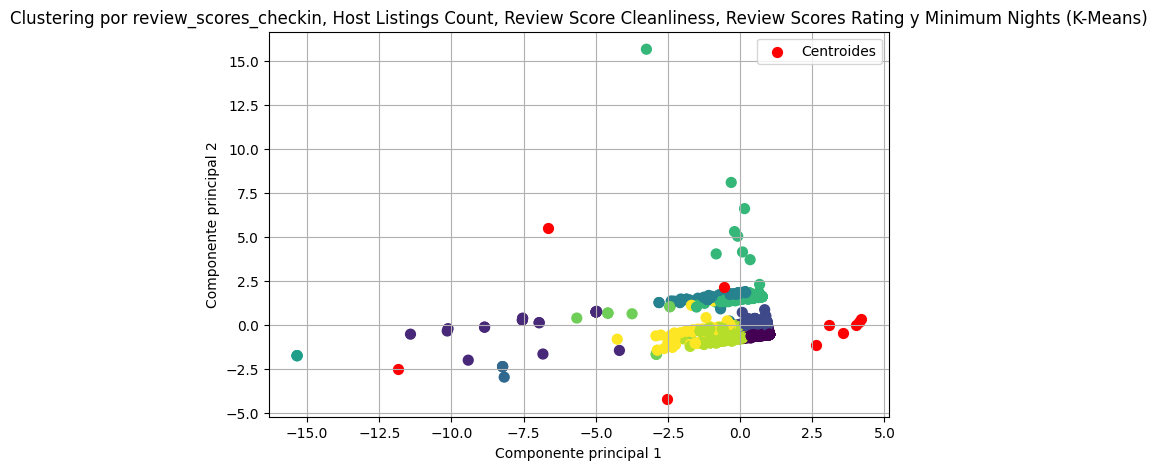

In [95]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por review_scores_checkin, Host Listings Count, Review Score Cleanliness, Review Scores Rating y Minimum Nights (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()